**1. Loading the data**


In [4]:
# importing librabries
import pandas as pd


In [9]:
temp_df = pd.read_csv('daily-minimum-temperatures-in-me.csv', on_bad_lines='skip')


In [10]:
temp_df.head()

,Date,"Daily minimum temperatures in Melbourne, Australia, 1981-1990"
0,1981-01-01,20.7
1,1981-01-02,17.9
2,1981-01-03,18.8
3,1981-01-04,14.6
4,1981-01-05,15.8


In [11]:
temp_df.shape

(3650, 2)

**2. Data Preprocessing**

In [14]:
##checking null values
temp_df.isnull().sum()

,0
Date,0
"Daily minimum temperatures in Melbourne, Australia, 1981-1990",0


In [16]:
## checking the column dtypes
temp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3650 entries, 0 to 3649
Data columns (total 2 columns):
 #   Column                                                         Non-Null Count  Dtype 
---  ------                                                         --------------  ----- 
 0   Date                                                           3650 non-null   object
 1   Daily minimum temperatures in Melbourne, Australia, 1981-1990  3650 non-null   object
dtypes: object(2)
memory usage: 57.2+ KB


In [17]:
# converting the date column to datetime
temp_df['Date'] = pd.to_datetime(temp_df['Date'])

In [18]:
# rename the column
temp_df.rename(columns={'Daily minimum temperatures in Melbourne, Australia, 1981-1990': 'Temprature'}, inplace=True)

In [23]:
temp_df[temp_df['Temprature'] == '?0.2']

,Date,Temprature
565,1982-07-20,?0.2


In [25]:
# keeping only numeric characters
temp_df['Temprature'] = temp_df['Temprature'].str.replace(r'[^0-9\.\-]', '', regex=True)


In [27]:
#coverting the 'Temp' column to Float datatype
temp_df['Temprature'] = temp_df['Temprature'].astype('float')

In [28]:
temp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3650 entries, 0 to 3649
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        3650 non-null   datetime64[ns]
 1   Temprature  3650 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 57.2 KB


In [29]:
#date -> ds
# temprature -> y
temp_df.rename(columns = {'Date': 'ds', 'Temprature': 'y'}, inplace=True)

In [30]:
temp_df.head()

,ds,y
0,1981-01-01,20.7
1,1981-01-02,17.9
2,1981-01-03,18.8
3,1981-01-04,14.6
4,1981-01-05,15.8


**3. Model Training**

In [31]:
from prophet import Prophet

In [32]:
model = Prophet()

In [33]:
model.fit(temp_df)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpo_tmul6u/932fix2p.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpo_tmul6u/zw8jrl2w.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=25785', 'data', 'file=/tmp/tmpo_tmul6u/932fix2p.json', 'init=/tmp/tmpo_tmul6u/zw8jrl2w.json', 'output', 'file=/tmp/tmpo_tmul6u/prophet_model855hjhxz/prophet_model-20250804034714.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
03:47:14 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
03:47:15 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


**4. Forcasting**

In [34]:
future = model.make_future_dataframe(periods=10, freq='D')

forcast = model.predict(future)

In [36]:
forcast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1981-01-01,11.845441,11.676163,18.847985,11.845441,11.845441,3.328357,3.328357,3.328357,0.010971,0.010971,0.010971,3.317386,3.317386,3.317386,0.0,0.0,0.0,15.173798
1,1981-01-02,11.843590,12.079475,18.909931,11.843590,11.843590,3.375348,3.375348,3.375348,-0.019836,-0.019836,-0.019836,3.395184,3.395184,3.395184,0.0,0.0,0.0,15.218939
2,1981-01-03,11.841740,11.961189,18.561745,11.841740,11.841740,3.412345,3.412345,3.412345,-0.060155,-0.060155,-0.060155,3.472501,3.472501,3.472501,0.0,0.0,0.0,15.254085
3,1981-01-04,11.839889,11.845867,18.773648,11.839889,11.839889,3.394984,3.394984,3.394984,-0.153103,-0.153103,-0.153103,3.548087,3.548087,3.548087,0.0,0.0,0.0,15.234873
4,1981-01-05,11.838038,12.072901,19.026457,11.838038,11.838038,3.600999,3.600999,3.600999,-0.019721,-0.019721,-0.019721,3.620720,3.620720,3.620720,0.0,0.0,0.0,15.439037


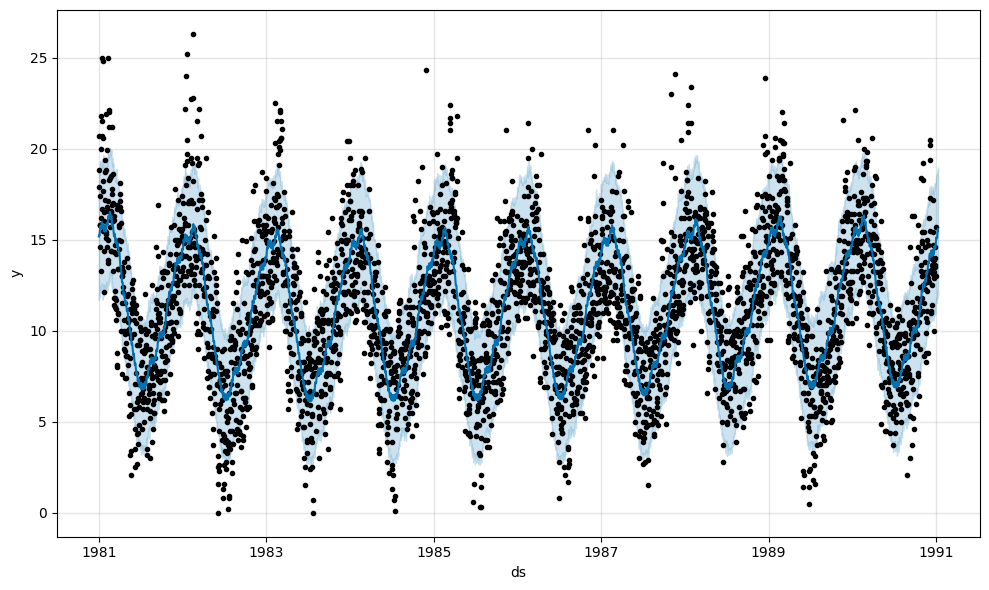

In [37]:
#plotting
fig = model.plot(forcast)

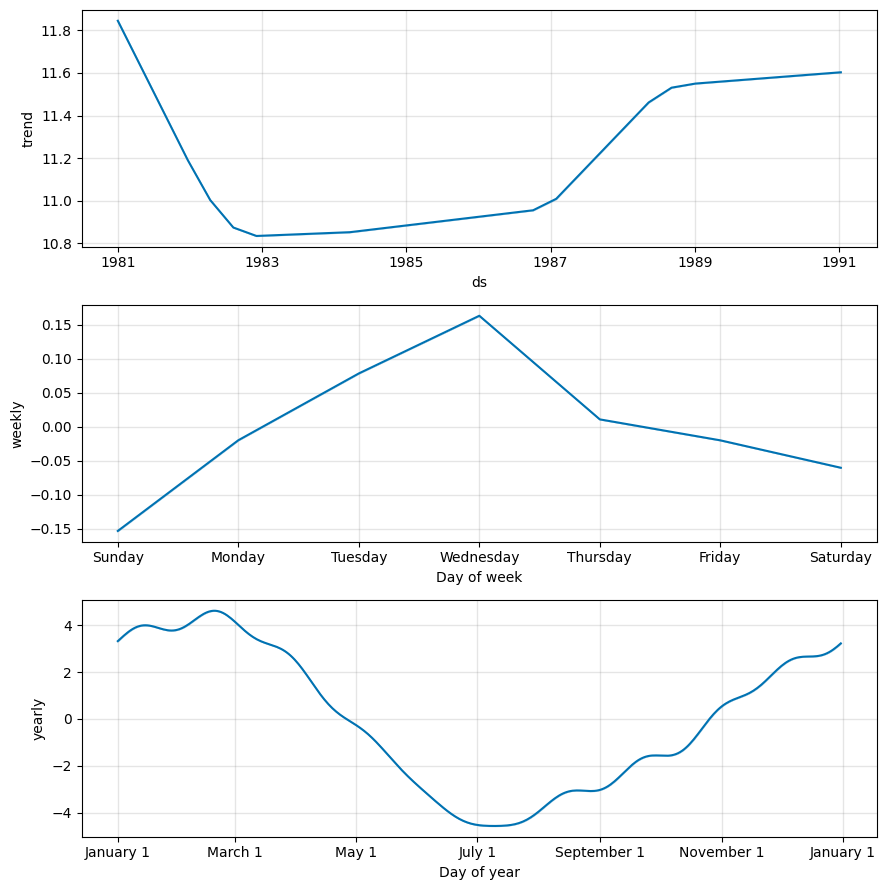

In [38]:
components = model.plot_components(forcast)